In [15]:
# Dependencies
import json
import requests
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import operator
from pprint import pprint

In [2]:
path = "tmdb-5000-movie-dataset/tmdb_5000_movies.csv"
df = pd.read_csv(path)
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
# Movie release dates are between 1916 and 2017
df['release_date'].sort_values(ascending= False).head(5)

4255    2017-02-03
3408    2016-10-02
3302    2016-09-16
4720    2016-09-09
3249    2016-09-09
Name: release_date, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [5]:
df = df.drop(columns= 'tagline')
df = df.drop(columns= 'homepage')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
dtypes: float64(3), int64(4), object(11)
memory usage: 675.5+ KB


In [6]:
genres = df['genres']
genres[0]



'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [7]:
title_list_0_1000 = list(df['title'][0:1000])
print(title_list_0_1000)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [8]:
# Test for one movie

apikey = "trilogy"
movie = "jack reacher"
query_url = f"http://www.omdbapi.com/?apikey={apikey}&"
# response = requests.get(f'{query_url}t={movie}').json()
# pprint(response)

In [9]:
# set up lists to hold reponse info

titles = []
year = []
rated = []
released = []
runtime = []
genre = []
director = []
writer = []
language = []
country = []
awards = []
m_ratings = []
i_ratings = []
boxoffice = []
production = []

record = 0
loop_set = 1


# 

print("Beginning Data Retrieval")
print("------------------------")

for title in title_list_0_1000:
    response = requests.get(f'{query_url}t={title}').json()
    record += 1
    #pprint(response)
    
    try:
        titles.append(response['Title'])
        year.append(response['Year'])
        rated.append(response['Rated'])
        released.append(response['Released'])
        runtime.append(response['Runtime'])
        genre.append(response['Genre'])
        director.append(response['Director'])
        writer.append(response['Writer'])
        language.append(response['Language'])
        country.append(response['Country'])
        awards.append(response['Awards'])
        m_ratings.append(response['Metascore'])
        i_ratings.append(response['imdbRating'])
        boxoffice.append(response['BoxOffice'])
        production.append(response['Production'])
        
        
        print(f"Processing Record {record} of Set {loop_set}: {title}")
    
    except(KeyError):
        print("Title is not found... skipping.")
        loop_set += 1

print("------------------------")
print("Data Retrieval Complete!")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1: Avatar
Processing Record 2 of Set 1: Pirates of the Caribbean: At World's End
Processing Record 3 of Set 1: Spectre
Processing Record 4 of Set 1: The Dark Knight Rises
Processing Record 5 of Set 1: John Carter
Processing Record 6 of Set 1: Spider-Man 3
Processing Record 7 of Set 1: Tangled
Processing Record 8 of Set 1: Avengers: Age of Ultron
Processing Record 9 of Set 1: Harry Potter and the Half-Blood Prince
Processing Record 10 of Set 1: Batman v Superman: Dawn of Justice
Processing Record 11 of Set 1: Superman Returns
Processing Record 12 of Set 1: Quantum of Solace
Processing Record 13 of Set 1: Pirates of the Caribbean: Dead Man's Chest
Processing Record 14 of Set 1: The Lone Ranger
Processing Record 15 of Set 1: Man of Steel
Processing Record 16 of Set 1: The Chronicles of Narnia: Prince Caspian
Processing Record 17 of Set 1: The Avengers
Processing Record 18 of Set 1: Pirates of the Caribbean: On St

Processing Record 161 of Set 1: How to Train Your Dragon 2
Processing Record 162 of Set 1: Gods of Egypt
Processing Record 163 of Set 1: Stealth
Processing Record 164 of Set 1: Watchmen
Processing Record 165 of Set 1: Lethal Weapon 4
Processing Record 166 of Set 1: Hulk
Processing Record 167 of Set 1: G.I. Joe: Retaliation
Processing Record 168 of Set 1: Sahara
Processing Record 169 of Set 1: Final Fantasy: The Spirits Within
Processing Record 170 of Set 1: Captain America: The First Avenger
Processing Record 171 of Set 1: The World Is Not Enough
Processing Record 172 of Set 1: Master and Commander: The Far Side of the World
Processing Record 173 of Set 1: The Twilight Saga: Breaking Dawn - Part 2
Processing Record 174 of Set 1: Happy Feet Two
Processing Record 175 of Set 1: The Incredible Hulk
Processing Record 176 of Set 1: The BFG
Processing Record 177 of Set 1: The Revenant
Processing Record 178 of Set 1: Turbo
Processing Record 179 of Set 1: Rango
Processing Record 180 of Set 1: P

Processing Record 328 of Set 4: The Lovely Bones
Processing Record 329 of Set 4: Finding Nemo
Processing Record 330 of Set 4: The Lord of the Rings: The Return of the King
Processing Record 331 of Set 4: The Lord of the Rings: The Two Towers
Processing Record 332 of Set 4: Seventh Son
Processing Record 333 of Set 4: Lara Croft: Tomb Raider
Processing Record 334 of Set 4: Transcendence
Processing Record 335 of Set 4: Jurassic Park III
Processing Record 336 of Set 4: Rise of the Planet of the Apes
Processing Record 337 of Set 4: The Spiderwick Chronicles
Processing Record 338 of Set 4: A Good Day to Die Hard
Processing Record 339 of Set 4: The Alamo
Processing Record 340 of Set 4: The Incredibles
Processing Record 341 of Set 4: Cutthroat Island
Title is not found... skipping.
Processing Record 343 of Set 5: Men in Black
Processing Record 344 of Set 5: Toy Story 2
Processing Record 345 of Set 5: Unstoppable
Processing Record 346 of Set 5: Rush Hour 2
Processing Record 347 of Set 5: What L

Processing Record 498 of Set 7: Red Dragon
Processing Record 499 of Set 7: Hidalgo
Processing Record 500 of Set 7: Jack and Jill
Processing Record 501 of Set 7: 2 Fast 2 Furious
Processing Record 502 of Set 7: The Little Prince
Processing Record 503 of Set 7: The Invasion
Processing Record 504 of Set 7: The Adventures of Rocky & Bullwinkle
Processing Record 505 of Set 7: The Secret Life of Pets
Processing Record 506 of Set 7: The League of Extraordinary Gentlemen
Processing Record 507 of Set 7: Despicable Me 2
Processing Record 508 of Set 7: Independence Day
Processing Record 509 of Set 7: The Lost World: Jurassic Park
Processing Record 510 of Set 7: Madagascar
Processing Record 511 of Set 7: Children of Men
Processing Record 512 of Set 7: X-Men
Processing Record 513 of Set 7: Wanted
Processing Record 514 of Set 7: The Rock
Processing Record 515 of Set 7: Ice Age: The Meltdown
Processing Record 516 of Set 7: 50 First Dates
Processing Record 517 of Set 7: Hairspray
Processing Record 518

Processing Record 677 of Set 7: Wyatt Earp
Processing Record 678 of Set 7: Clear and Present Danger
Processing Record 679 of Set 7: Dragon Blade
Processing Record 680 of Set 7: Little Man
Processing Record 681 of Set 7: U-571
Processing Record 682 of Set 7: The American President
Processing Record 683 of Set 7: The Love Guru
Processing Record 684 of Set 7: 3000 Miles to Graceland
Processing Record 685 of Set 7: The Hateful Eight
Processing Record 686 of Set 7: Blades of Glory
Processing Record 687 of Set 7: Hop
Processing Record 688 of Set 7: 300
Processing Record 689 of Set 7: Meet the Fockers
Processing Record 690 of Set 7: Marley & Me
Processing Record 691 of Set 7: The Green Mile
Processing Record 692 of Set 7: Wild Hogs
Processing Record 693 of Set 7: Chicken Little
Processing Record 694 of Set 7: Gone Girl
Processing Record 695 of Set 7: The Bourne Identity
Processing Record 696 of Set 7: GoldenEye
Processing Record 697 of Set 7: The General's Daughter
Processing Record 698 of Se

Processing Record 853 of Set 11: The Phantom of the Opera
Processing Record 854 of Set 11: Elizabeth: The Golden Age
Processing Record 855 of Set 11: Æon Flux
Processing Record 856 of Set 11: Gods and Generals
Processing Record 857 of Set 11: Turbulence
Processing Record 858 of Set 11: Imagine That
Processing Record 859 of Set 11: Muppets Most Wanted
Processing Record 860 of Set 11: Thunderbirds
Processing Record 861 of Set 11: Burlesque
Processing Record 862 of Set 11: A Very Long Engagement
Processing Record 863 of Set 11: Lolita
Title is not found... skipping.
Processing Record 865 of Set 12: Blade II
Processing Record 866 of Set 12: Seven Pounds
Processing Record 867 of Set 12: Bullet to the Head
Processing Record 868 of Set 12: The Godfather: Part III
Processing Record 869 of Set 12: Elizabethtown
Processing Record 870 of Set 12: You, Me and Dupree
Processing Record 871 of Set 12: Superman II
Processing Record 872 of Set 12: Gigli
Processing Record 873 of Set 12: All the King's Me

In [10]:
movies_df = pd.DataFrame({"Title" : titles, 
                          "Year" : year, 
                          "Rated" : rated, 
                          "Runtime" : runtime, 
                          "Genre" : genre,
                          "Director" : director,
                          "Writer" : writer,
                          "Language" : language,
                          "Country" : country,
                          "Awards" : awards,
                          "Metascore" : m_ratings,
                          "IMDB Rating" : i_ratings})
#                          "Production Company" : production})
#                          "Box Office" : boxoffice})

movies_df.head(10)


,Title,Year,Rated,Runtime,Genre,Director,Writer,Language,Country,Awards,Metascore,IMDB Rating
0,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"English, Spanish","UK, USA",Won 3 Oscars. Another 85 wins & 128 nominations.,83,7.8
1,Pirates of the Caribbean: At World's End,2007,PG-13,169 min,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott, Terry Rossio, Ted Elliott (charac...","Mandarin, English",USA,Nominated for 2 Oscars. Another 20 wins & 44 n...,50,7.1
2,Spectre,2015,PG-13,148 min,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...","English, Spanish, Italian, German, French","UK, USA",Won 1 Oscar. Another 7 wins & 32 nominations.,60,6.8
3,The Dark Knight Rises,2012,PG-13,164 min,"Action, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Arabic","UK, USA",Nominated for 1 BAFTA Film Award. Another 38 w...,78,8.4
4,John Carter,2012,PG-13,132 min,"Action, Adventure, Sci-Fi",Andrew Stanton,"Andrew Stanton (screenplay by), Mark Andrews (...",English,USA,2 wins & 8 nominations.,51,6.6
5,Spider-Man 3,2007,PG-13,139 min,"Action, Adventure, Sci-Fi",Sam Raimi,"Sam Raimi (screenplay), Ivan Raimi (screenplay...","English, French",USA,Nominated for 1 BAFTA Film Award. Another 3 wi...,59,6.2
6,Tangled,2010,PG,100 min,"Animation, Adventure, Comedy, Family, Fantasy,...","Nathan Greno, Byron Howard","Dan Fogelman (screenplay by), Jacob Grimm (bas...",English,USA,Nominated for 1 Oscar. Another 9 wins & 40 nom...,71,7.8
7,Avengers: Age of Ultron,2015,PG-13,141 min,"Action, Adventure, Sci-Fi",Joss Whedon,"Joss Whedon, Stan Lee (based on the Marvel com...","English, Korean",USA,7 wins & 45 nominations.,66,7.3
8,Harry Potter and the Half-Blood Prince,2009,PG,153 min,"Adventure, Family, Fantasy, Mystery",David Yates,"Steve Kloves (screenplay), J.K. Rowling (novel)",English,"UK, USA",Nominated for 1 Oscar. Another 8 wins & 35 nom...,78,7.6
9,Batman v Superman: Dawn of Justice,2016,PG-13,151 min,"Action, Adventure, Fantasy, Sci-Fi",Zack Snyder,"Chris Terrio, David S. Goyer, Bob Kane (Batman...",English,USA,14 wins & 30 nominations.,44,6.5


In [11]:
# Highest revenue generating movies 
revenue_df = pd.DataFrame({'Title' : df['title'],
                           'Revenue': df['revenue'],
                           'Budget' : df['budget']})
revenue_df.sort_values(by= 'Revenue', ascending=False)

,Title,Revenue,Budget
0,Avatar,2787965087,237000000
25,Titanic,1845034188,200000000
16,The Avengers,1519557910,220000000
28,Jurassic World,1513528810,150000000
44,Furious 7,1506249360,190000000
7,Avengers: Age of Ultron,1405403694,280000000
124,Frozen,1274219009,150000000
31,Iron Man 3,1215439994,200000000
546,Minions,1156730962,74000000
26,Captain America: Civil War,1153304495,250000000


In [26]:

merged_df=pd.merge(movies_df, revenue_df, on='Title')
merged_df.head()

,Title,Year,Rated,Runtime,Genre,Director,Writer,Language,Country,Awards,Metascore,IMDB Rating,Revenue,Budget
0,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"English, Spanish","UK, USA",Won 3 Oscars. Another 85 wins & 128 nominations.,83,7.8,2787965087,237000000
1,Pirates of the Caribbean: At World's End,2007,PG-13,169 min,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott, Terry Rossio, Ted Elliott (charac...","Mandarin, English",USA,Nominated for 2 Oscars. Another 20 wins & 44 n...,50,7.1,961000000,300000000
2,Spectre,2015,PG-13,148 min,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...","English, Spanish, Italian, German, French","UK, USA",Won 1 Oscar. Another 7 wins & 32 nominations.,60,6.8,880674609,245000000
3,The Dark Knight Rises,2012,PG-13,164 min,"Action, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Arabic","UK, USA",Nominated for 1 BAFTA Film Award. Another 38 w...,78,8.4,1084939099,250000000
4,John Carter,2012,PG-13,132 min,"Action, Adventure, Sci-Fi",Andrew Stanton,"Andrew Stanton (screenplay by), Mark Andrews (...",English,USA,2 wins & 8 nominations.,51,6.6,284139100,260000000


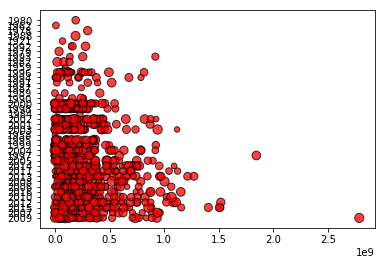

In [33]:
# Bubble plot to show revenue by year, with bubble size corresponding to score
merged_df.dropna()
list=[]
for list_item in merged_df['Metascore']:
    if list_item=="N/A":
        list_item=0
    else:
        list.append(int(list_item))
    
    
    
plt.scatter(merged_df['Revenue'], merged_df['Year'], marker="o", facecolors="red", edgecolors="black",
            s=list,alpha=0.75)
plt.show()

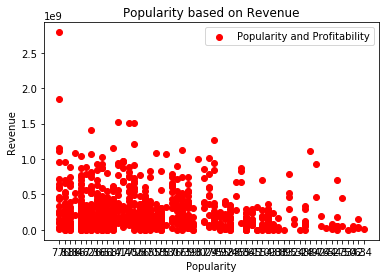

In [35]:
#Scatter plot based on popularity vs profitability
x_axis=merged_df['IMDB Rating']
y_axis=merged_df['Revenue']
plt.scatter(x_axis, y_axis, color="red", label="Popularity and Profitability")
plt.legend(loc="upper right")
plt.title("Popularity based on Revenue")
plt.xlabel("Popularity")
plt.ylabel("Revenue")
plt.show()

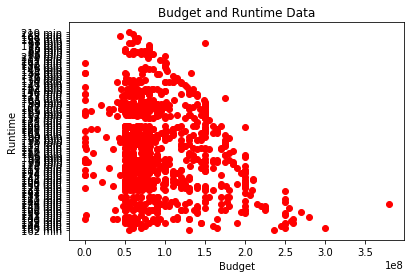

In [37]:
#Budget vs Runtime Scatter Plot
x_axis=merged_df['Budget']
y_axis=merged_df['Runtime']
plt.scatter(x_axis, y_axis, color="red", label="Budget vs Runtime")
plt.title("Budget and Runtime Data")
plt.xlabel("Budget")
plt.ylabel("Runtime")
plt.show()